<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Laboratorios_Taller/Lab06_ec_variable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ecuaciones de una variable:

Para los siguiente problemas:


1.0 ¿Para que ángulo el area del segmento circular es igual a un cuarto del area de la circunferencia?

- Muestre que la expresión que permite resolver el problema:


\begin{equation}
\theta - \sin \theta = \frac{\pi}{2}
\end{equation}


- ¿Construya una grafica para theta?,  Alrededor de que punto esta solución.(Para este punto se recomienda emplear un data frame de pandas )

- Emplee el metodo de biseccion, punto fijo,  newton y secante  para comprobar la solución intuida del apartado anterior.


2.0 An object falling vertically through the air is subjected to viscous resistance as well as to the force
of gravity. Assume that an object with mass m is dropped from a height s0 and that the height of the
object after t seconds is

\begin{equation}
s(t)=s_0 - \frac{mg}{k}t+\frac{m^2g}{k}t(1-e^{-kt/m})
\end{equation}

where $g = 32.17 ft/s2$ and $k$ represents the coefficient of air resistance in $lbs/ft$. Suppose $s0 = 300 ft$,
$m = 0.25$ lb, and $k = 0.1$ lbs/ft. Find, to within $0.01$ s, the time it takes this quarter-pounder to hit the
ground

- Emplee el metodo de biseccion, punto fijo,  newton y secante  para comprobrar la solución.



3.0 En la teoria de campo medio, La magnetización como función de la temperatura de un material magnético  puede ser calculada como:

\begin{equation}
m(T) = \tanh\left( \frac{m(T)}{T} \right)
\end{equation}

donde m y T son la magnetizacion y temperatura reducida respectivamente

Para T = 0.5, determine:

a. La magnetización reducida empleando el metodo de la secante(Muestre su resultado con 4 cifras)

b. Valide su respuestado con el metodo de punto fijo.
(Muestre su resultado con 4 cifras)

d. Defina T = np.linspace(0.1,0.99,100), y emple el metodo de la secante para construir un gráfico de magnetización reducida como función de la temperatura para los  100 valores  de T.



5. Construir un fractal empleando el metodo de Newton-Raphson,
(Reproducir código y entender)
\begin{equation}
z_{n+1} = z_n -a \frac{f(z)}{f'(z)}
\end{equation}



\begin{equation}
f'(z) = \frac{ f(z+h)+f(z) }{h}
\end{equation}


Replicar el codigo y entender.


```

import numpy as np
import matplotlib.pylab as plt
from PIL import Image

Npx_X = 80 #Numero de pixeles en x
Npx_Y = 80 #Numero de pixeles en y

image = Image.new("RGB", (Npx_X, Npx_Y)) #Creacion de la imagen inicial

npx = np.arange(0, Npx_X)
npy = np.arange(0, Npx_Y)

xmin = -1
xmax = 1
ymin = -1
ymax = 1
#Transformación al plano complejo en un rectangulo (xmin, xmax), (ymin, ymax)
zx = npx * (xmax - xmin) / (Npx_X - 1)   + xmin
zy = npy * (ymax-ymin) / (Npx_Y - 1) + ymin

#Definicion  la funcion y las derivada
def f(z):
  return z**3 - 1

def fp(z):
  return 3*z**2

h = 1E-4
def fpn(z, h):
  return (f(z+h)-f(z))/h
  

a = 0.2
Niteraciones = 120
eps = 1E-8

x = - 1
for zx_ in zx:
  x = x + 1
  y = -1
  for zy_ in zy:
      y = y + 1
      Z_0 = complex(zx_, zy_)
    
      for i in range(0, Niteraciones):
        Z = Z_0 - a * f(Z_0)/fp(Z_0)

        if( abs(Z-Z_0)<= eps):
          break
          
        Z_0 = Z
      #print(i)
      #print(i)
      r, g, b = i % 4 *64 , i % 8 *16, i% 16* 16
      
      image.putpixel((x,y), (r,g,b) )


plt.imshow(image)
#plt.xlim(400, 600)
#plt.ylim(400, 523)
```


La raíz encontrada es:  1.5707963267955165


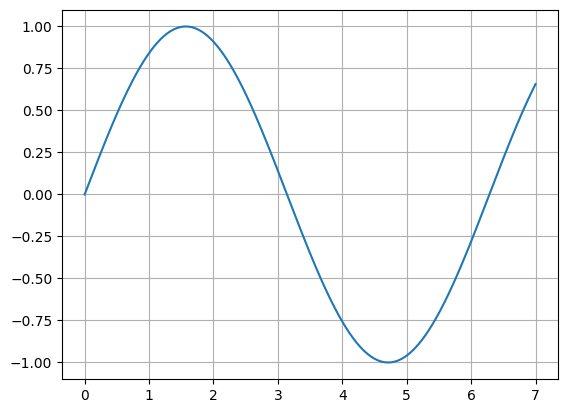

In [ ]:
#punto 1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize  as optimize

y = np.linspace(0,7,1000)
x = np.zeros(len(y))

for i in range(len(y)):
    x[i]= np.sin(y[i])


raiz = optimize.bisect(lambda x: np.cos(x),1,4)
print("La raíz encontrada es: ",raiz)

plt.plot(y,x)
plt.grid()
plt.show()

In [ ]:
#Verificación por método de bisección:
def biseccion(f,a,b,tol):
    if f(a)*f(b)>=0:
        return 'Error f(a) y f(b) deben tener signo contrario'

    p=(a+b)/2



    while abs(f(p))>tol:

        if f(a)*f(p)<0:
            b=p
        if f(p)*f(b)<0:
            a=p

        p=(a+b)/2



    return p

print(biseccion(lambda x: np.cos(x), 1,4, 1e-10))

1.5707963267341256


In [ ]:
#Verificación por método de newton-raphson
def f(x):
    return np.cos(x)

def df(x):
    return -np.sin(x)

def newton_raphson(p0,tol):
    p=p0

    while abs(f(p))>tol:
        p=p-(f(p))/(df(p))


    return p

print(newton_raphson(1,1e-10))

1.5707963267954879


In [ ]:
#Verificación por método de punto fijo
def punto_fijo(f,p0,Nmax):
    def g(x):
        return f(x) + x

    n=0
    p=p0

    while n<Nmax:
        p=g(p)
        n+=1

    return p

print(punto_fijo(lambda x: np.cos(x), 1, 1000))

1.5707963267948966


In [ ]:
#Verificación por método de la secante
def secante(f,p0,p1,resolution):

    pn_1=p1
    pn_2=p0

    res=resolution

    while abs(pn_1-pn_2) > res:
        pn=pn_1-(f(pn_1)*(pn_1-pn_2))/(f(pn_1)-f(pn_2))

        pn_2 = pn_1 +0.
        pn_1 = pn + 0.




    return pn

print(secante(lambda x: np.cos(x), 1,2, 1e-9))

1.5707963267948966


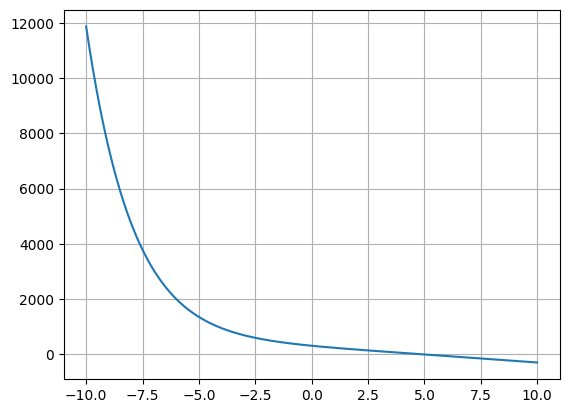

In [ ]:
# punto 2

m=0.25
s=300
k=0.1
g=32.17

f = lambda t : s - ((m*g)/k) * t  + (((m**2)*g)/k)* t*(1-np.exp(-k*t/m))
df = lambda t : -1*((m*g)/k)  + (((m**2)*g)/k)* t*(1 + (k/m)*np.exp(-k*t/m)) + (((m**2)*g)/k)*(1-np.exp(-k*t/m))

t_array= np.arange(-10,10,0.01)
x = np.zeros(len(t_array))

for i in range(len(t_array)):
    x[i]=f(t_array[i])


plt.plot(t_array,x)
plt.grid()
plt.show()

In [ ]:
raiz_biseccion = optimize.bisect(f,2,8)

h =lambda t :t -(+ s - ((m*g)/k) * t  + (((m**2)*g)/k)* t*(1-np.exp(-k*t/m)))
raiz_puntofijo = optimize.fixed_point(h,6)


raiz_newton = optimize.newton(f,2)
raiz_secante = optimize.newton(f, 2)

print(raiz_biseccion)
print(raiz_puntofijo)
print(raiz_newton)
print(raiz_secante)

4.736139137603004
4.73613913760349
4.73613913760349
4.73613913760349


In [ ]:
#Punto 3

#No me da la función que aparece en el enunciado, siempre me sale un error ya que es necesario un valor inicial para m(T).



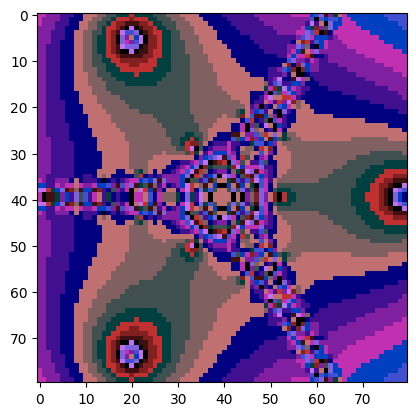

In [ ]:
#Punto del fractal/ Replicar y entender

import numpy as np
import matplotlib.pylab as plt
from PIL import Image

Npx_X = 80 #Numero de pixeles en x
Npx_Y = 80 #Numero de pixeles en y

image = Image.new("RGB", (Npx_X, Npx_Y)) #Creacion de la imagen inicial

npx = np.arange(0, Npx_X)
npy = np.arange(0, Npx_Y)

xmin = -1
xmax = 1
ymin = -1
ymax = 1
# Transformación al plano complejo en un rectangulo (xmin, xmax), (ymin, ymax)
zx = npx * (xmax - xmin) / (Npx_X - 1)   + xmin
zy = npy * (ymax-ymin) / (Npx_Y - 1) + ymin

# Definicion  la funcion y las derivadas
def f(z):
  return z**3 - 1

def fp(z):
  return 3*z**2

h = 1E-4
def fpn(z, h):
  return (f(z+h)-f(z))/h


a = 0.2
Niteraciones = 120
eps = 1E-8

x = - 1
for zx_ in zx:
  x = x + 1
  y = -1
  for zy_ in zy:
      y = y + 1
      Z_0 = complex(zx_, zy_)

      for i in range(0, Niteraciones):
        Z = Z_0 - a * f(Z_0)/fp(Z_0)

        if( abs(Z-Z_0)<= eps):
          break

        Z_0 = Z
      #print(i)
      #print(i)
      r, g, b = i % 4 *64 , i % 8 *16, i% 16* 16

      image.putpixel((x,y), (r,g,b) )


plt.imshow(image)
#plt.xlim(400, 600)
#plt.ylim(400, 523)